In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

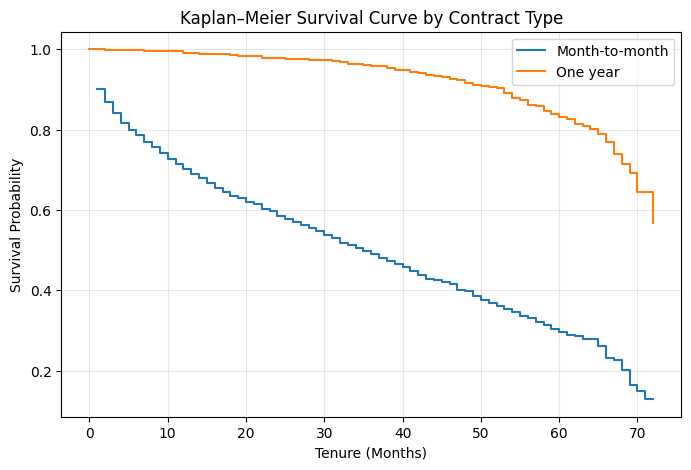

In [ ]:
df['Churn_Flag'] = df['Churn'].apply(lambda x: 1 if x == "Yes" else 0)

df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

group1 = df[df['Contract'] == "Month-to-month"][['tenure','Churn_Flag']].dropna()
group2 = df[df['Contract'] == "One year"][['tenure','Churn_Flag']].dropna()

def km_curve(data):
    times = np.sort(data['tenure'].unique())
    surv = []
    n_at_start = len(data)
    at_risk = n_at_start
    prev_surv = 1

    for t in times:
        d = data[(data['tenure'] == t) & (data['Churn_Flag'] == 1)].shape[0]
        if at_risk > 0:
            prev_surv = prev_surv * (1 - d / at_risk)
        surv.append(prev_surv)
        at_risk -= data[data['tenure'] == t].shape[0]

    return times, np.array(surv)

t1, s1 = km_curve(group1)
t2, s2 = km_curve(group2)

plt.figure(figsize=(8,5))
plt.step(t1, s1, where='post', label="Month-to-month")
plt.step(t2, s2, where='post', label="One year")

plt.xlabel("Tenure (Months)")
plt.ylabel("Survival Probability")
plt.title("Kaplan–Meier Survival Curve by Contract Type")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
len(group1)

3875

In [ ]:
len(group2)

1473